In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import geopandas as gpd
import rasterio
from rasterio.plot import show, show_hist
from rasterio.warp import calculate_default_transform, reproject, Resampling
from skimage.feature import match_template
import numpy as np
from PIL import Image
import os

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
# from google.colab import files
# uploaded = files.upload()

# Shape file 

In [4]:
# open labeled trees shapefile
tree_data = gpd.read_file('trees.shp')
print('CRS of point data: ' + str(tree_data.crs))

CRS of point data: epsg:4326


# Raster file

In [5]:
# open NYC Central Park raster file
park_raster = rasterio.open('NYC_CentralPark.tif')
print('CRS of raster data: ' + str(park_raster.crs))
print('Number of raster bands: ' + str(park_raster.count))
print('Interpretation of raster bands: ' + str(park_raster.colorinterp))

CRS of raster data: EPSG:26918
Number of raster bands: 4
Interpretation of raster bands: (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>, <ColorInterp.undefined: 0>)


# Reprojection

In [6]:
dst_crs = 'epsg:4326'
with rasterio.open('NYC_CentralPark.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('NYC_CentralPark_84.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

In [7]:
# open NYC Central Park 84 raster file
park_raster = rasterio.open('NYC_CentralPark_84.tif')
print('CRS of raster data: ' + str(park_raster.crs))
print('Number of raster bands: ' + str(park_raster.count))
print('Interpretation of raster bands: ' + str(park_raster.colorinterp))

CRS of raster data: EPSG:4326
Number of raster bands: 4
Interpretation of raster bands: (<ColorInterp.red: 3>, <ColorInterp.green: 4>, <ColorInterp.blue: 5>, <ColorInterp.alpha: 6>)


Now, the CRS of shape file is align with the CRS of raster file.

# Plot all trees

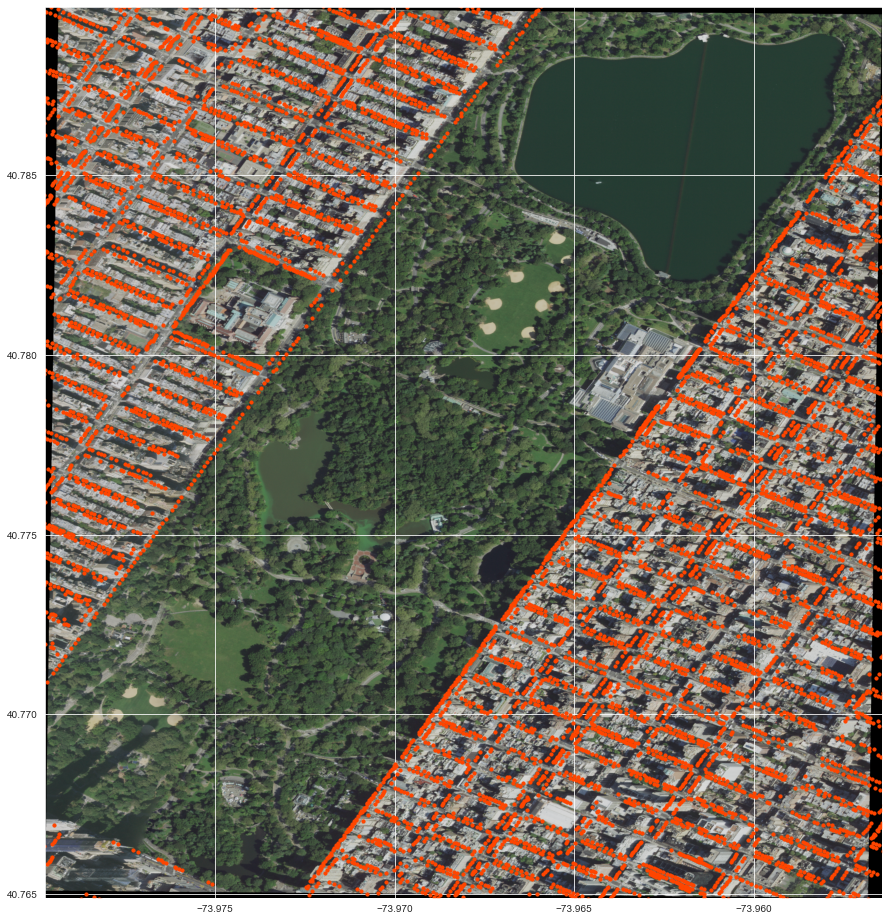

In [8]:
# show point and raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(15,20))
tree_data.plot(ax=ax, color='orangered', markersize=10)
show(park_raster, ax=ax);